## Santander-Customer-Transaction-Prediction

#### Background:
At Santander, mission is to help people and businesses prosper. We are always looking
for ways to help our customers understand their financial health and identify which
products and services might help them achieve their monetary goals.
Our data science team is continually challenging our machine learning algorithms,
working with the global data science community to make sure we can more accurately
identify new ways to solve our most common challenge, binary classification problems
such as: 
- is a customer satisfied?
- Will a customer buy this product? 
- Can a customer pay this loan? 

#### Problem Statement:
We need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

- Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
- Classification: The label is a binary variable, 0 (will not make a specific transaction in the future), 1 (will make a specific transaction in the future)

### Import Packages

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
#model selection
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, auc,confusion_matrix



### Exploratory Data Analysis (EDA)

- Data Collection
- Data Visualization
- Data Preprocessing

### Data Collection

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
print(train.shape)
train.head(5)

(200000, 202)


ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


####  train contains:

- ID_code (string)
- target
- 200 numerical variables, named from var_0 to var_199

####  test contains:

- ID_code (string)
- 200 numerical variables, named from var_0 to var_199

In [6]:
print(test.shape)
test.head(5)

(200000, 201)


ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [4]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8      ...              var_190  \
count  200000.000000  200000.000000      ...        200000.000000   
mean       16.545850       0.284162      ...             3.234440   
std         3.418076       3.332634      ...             4.559922   
min         5.349700     -10.505500      ...           -14.093300   
25%        13.943800      -2.317800      ...            -0.058825   
50%        16.456800       0.393700      ...             3.203600   
75%        19.102900       2.937900      ...             6.406200   
max        27.691800      10.151300      ...            18.440900   

             var_191        var_192        var_193        var_194  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        7.438408       1.927839       3.331774      17.993784   
std         3.023272       1.478423       3.992030       3.135162   
min        -2.691700      -3.814500     -11.783400       8.694400   
25%         5.157400       0.889775       0.584600      15.629800   
50%         7.347750       1.901300       3.396350      17.957950   
75%         9.512525       2.949500       6.205800      20.396525   
max        16.716500       8.402400      18.281800      27.928800   

             var_195        var_196        var_197        var_198  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -0.142088       2.303335       8.908158      15.870720   
std         1.429372       5.454369       0.921625       3.010945   
min        -5.261000     -14.209600       5.960600       6.299300   
25%        -1.170700      -1.946925       8.252800      13.829700   
50%        -0.172700       2.408900       8.888200      15.934050   
75%         0.829600       6.556725       9.593300      18.064725   
max         4.272900      18.321500      12.000400      26.079100   

             var_199  
count  200000.000000  
mean       -3.326537  
std        10.438015  
min       -38.852800  
25%       -11.208475  
50%        -2.819550  
75%         4.836800  
max        28.500700  

[8 rows x 201 columns]

### Observation
- In target variable mean and median are close together.
- For some variables minimum values are negative.


In [5]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

- It's a imbalanced dataset

### Data Visualization


In [6]:
num_features=train.columns[2:]

In [7]:
num_features

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

Distributions columns


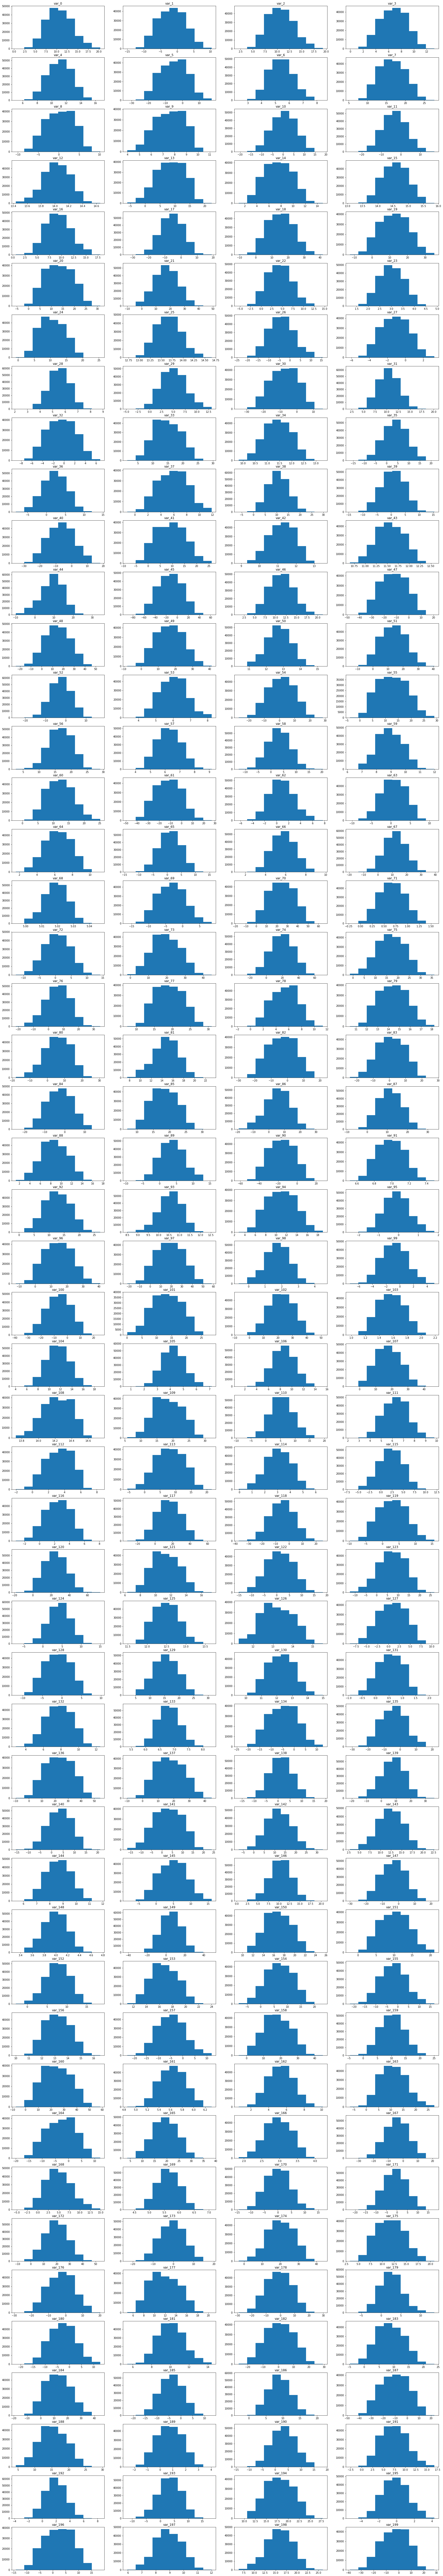

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, c in enumerate(num_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[c]) 
    plt.title(c)

Distribution of columns per target class


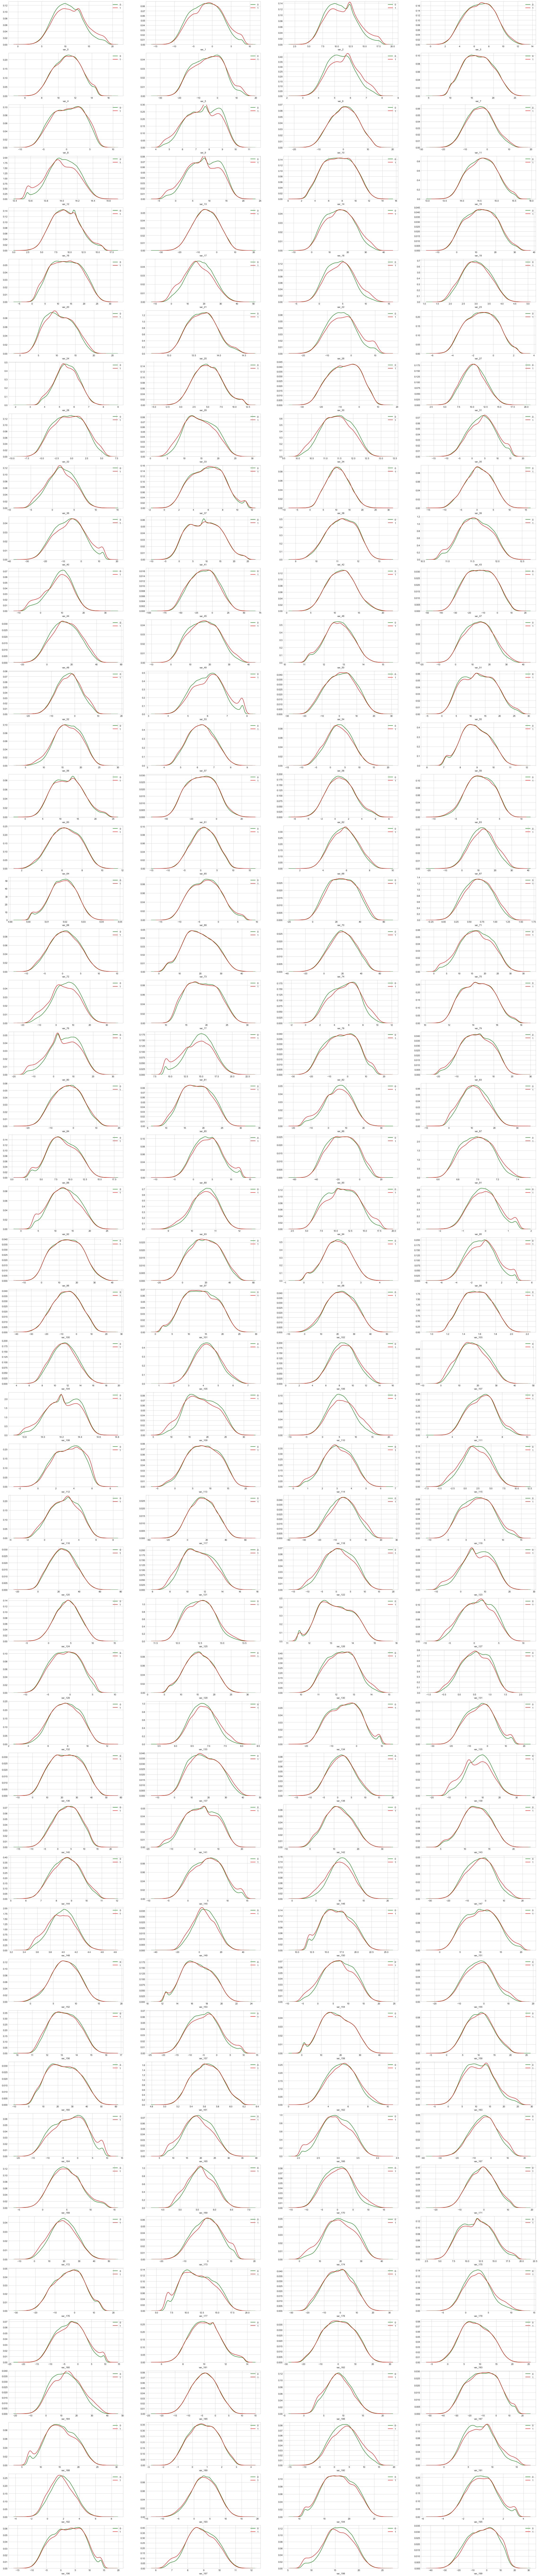

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Distribution of columns per target class")
sns.set_style('whitegrid')
plt.figure(figsize=(40,200))
for i,col in enumerate(num_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train[train['target']==0][col],hist=False,label='0',color='green')
    sns.distplot(train[train['target']==1][col],hist=False,label='1',color='red')
  

Distribution of columns for test and train datset


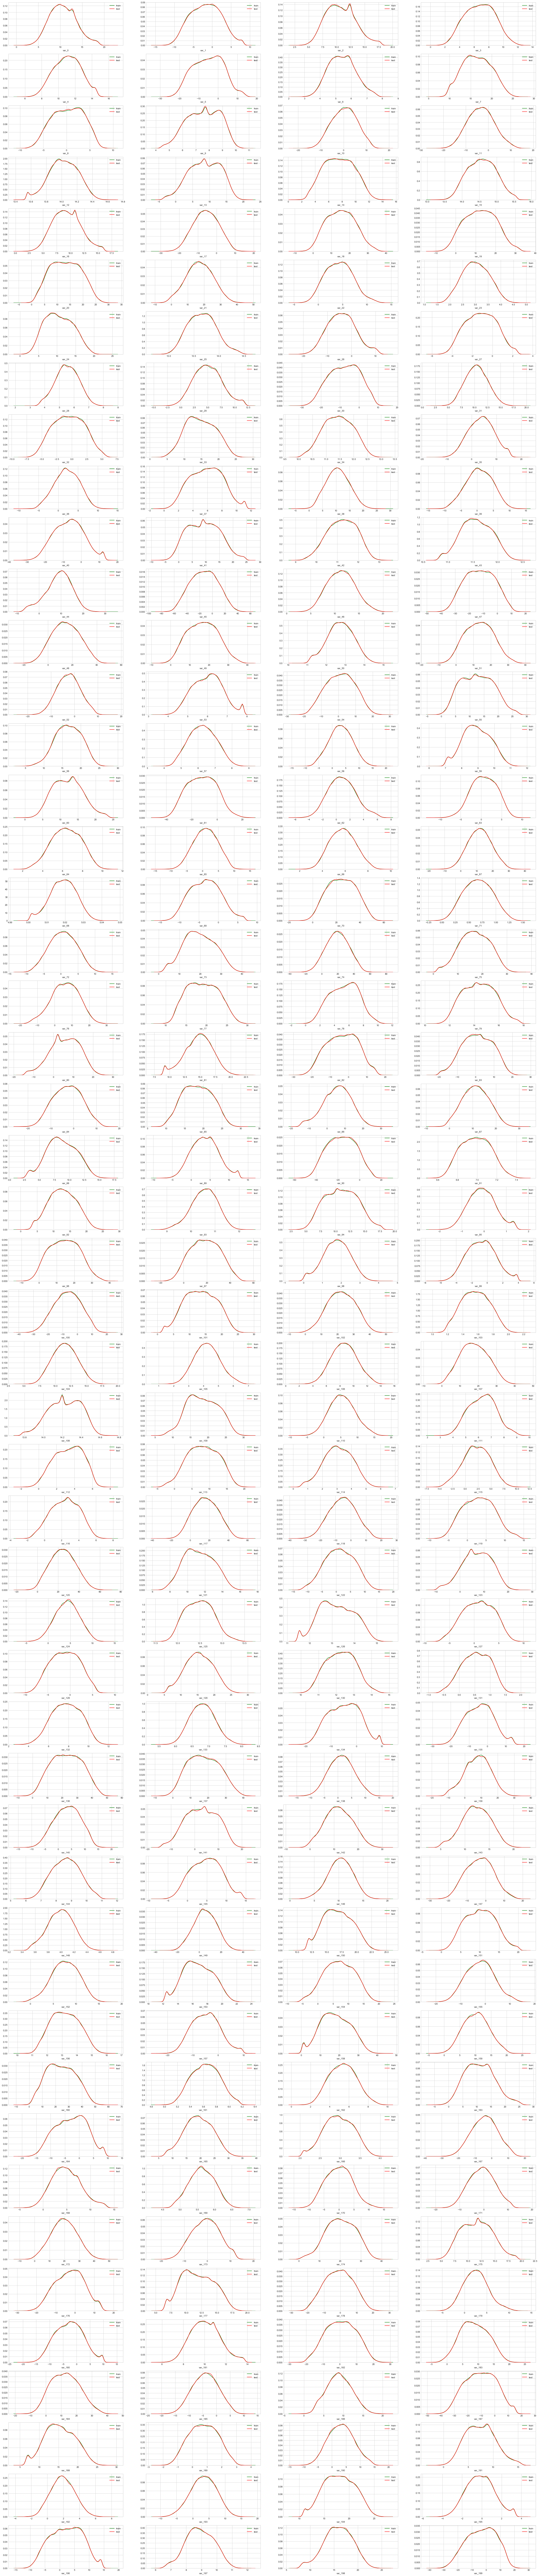

In [12]:
#Distribution of numeri variables in train and test data 
print("Distribution of columns for test and train datset")
sns.set_style('whitegrid')
plt.figure(figsize=(40,200))
for i,col in enumerate(num_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train[col],hist=False,label='train',color='green')
    sns.distplot(test[col],hist=False,label='test',color='red')

#### Observation

- All of these variables have a bump of frequency that matches the rising of the probability of making a transaction.
- if pdf(target = 1) - pdf(target = 0) > 0, then there is a high probability of the client making a transfer.

###  Data Preprocessing

### Missing value analysis

In [13]:
train.isnull().any()

ID_code    False
target     False
var_0      False
var_1      False
var_2      False
var_3      False
var_4      False
var_5      False
var_6      False
var_7      False
var_8      False
var_9      False
var_10     False
var_11     False
var_12     False
var_13     False
var_14     False
var_15     False
var_16     False
var_17     False
var_18     False
var_19     False
var_20     False
var_21     False
var_22     False
var_23     False
var_24     False
var_25     False
var_26     False
var_27     False
           ...  
var_170    False
var_171    False
var_172    False
var_173    False
var_174    False
var_175    False
var_176    False
var_177    False
var_178    False
var_179    False
var_180    False
var_181    False
var_182    False
var_183    False
var_184    False
var_185    False
var_186    False
var_187    False
var_188    False
var_189    False
var_190    False
var_191    False
var_192    False
var_193    False
var_194    False
var_195    False
var_196    False
var_197    Fal

In [14]:
test.isnull().any()

ID_code    False
var_0      False
var_1      False
var_2      False
var_3      False
var_4      False
var_5      False
var_6      False
var_7      False
var_8      False
var_9      False
var_10     False
var_11     False
var_12     False
var_13     False
var_14     False
var_15     False
var_16     False
var_17     False
var_18     False
var_19     False
var_20     False
var_21     False
var_22     False
var_23     False
var_24     False
var_25     False
var_26     False
var_27     False
var_28     False
           ...  
var_170    False
var_171    False
var_172    False
var_173    False
var_174    False
var_175    False
var_176    False
var_177    False
var_178    False
var_179    False
var_180    False
var_181    False
var_182    False
var_183    False
var_184    False
var_185    False
var_186    False
var_187    False
var_188    False
var_189    False
var_190    False
var_191    False
var_192    False
var_193    False
var_194    False
var_195    False
var_196    False
var_197    Fal

In [15]:
train.isnull().sum().sum()

0

In [16]:
test.isnull().sum().sum()

0

- No missing value

In [17]:
for col in train.columns[2:]:
    print("Number of unique values of {} : {}".format(col, train[col].nunique()))

Number of unique values of var_0 : 94672
Number of unique values of var_1 : 108932
Number of unique values of var_2 : 86555
Number of unique values of var_3 : 74597
Number of unique values of var_4 : 63515
Number of unique values of var_5 : 141029
Number of unique values of var_6 : 38599
Number of unique values of var_7 : 103063
Number of unique values of var_8 : 98617
Number of unique values of var_9 : 49417
Number of unique values of var_10 : 128764
Number of unique values of var_11 : 130193
Number of unique values of var_12 : 9561
Number of unique values of var_13 : 115181
Number of unique values of var_14 : 79122
Number of unique values of var_15 : 19810
Number of unique values of var_16 : 86918
Number of unique values of var_17 : 137823
Number of unique values of var_18 : 139515
Number of unique values of var_19 : 144180
Number of unique values of var_20 : 127764
Number of unique values of var_21 : 140062
Number of unique values of var_22 : 90660
Number of unique values of var_23 

- Most features have more than thousands of values for each variable except var_68 (451)

In [18]:
train['var_68'].value_counts()

5.0214    1084
5.0215    1081
5.0209    1080
5.0183    1077
5.0179    1071
5.0208    1070
5.0193    1070
5.0202    1069
5.0174    1066
5.0203    1063
5.0189    1063
5.0195    1062
5.0220    1060
5.0204    1059
5.0211    1058
5.0188    1057
5.0157    1054
5.0158    1049
5.0219    1049
5.0190    1048
5.0201    1047
5.0221    1043
5.0207    1040
5.0192    1038
5.0212    1038
5.0184    1035
5.0205    1033
5.0151    1031
5.0185    1029
5.0197    1029
          ... 
4.9976       1
5.0415       1
5.0458       1
4.9951       1
5.0445       1
4.9995       1
5.0444       1
5.0000       1
5.0426       1
5.0421       1
4.9984       1
5.0419       1
5.0422       1
4.9964       1
5.0436       1
4.9979       1
4.9993       1
4.9977       1
5.0414       1
5.0418       1
5.0410       1
5.0412       1
4.9978       1
5.0469       1
4.9967       1
5.0407       1
5.0411       1
4.9938       1
4.9989       1
5.0431       1
Name: var_68, Length: 451, dtype: int64

In [19]:
for col in test.columns[2:]:
    print("Number of unique values of {} : {}".format(col, test[col].nunique()))

Number of unique values of var_1 : 71661
Number of unique values of var_2 : 61865
Number of unique values of var_3 : 56507
Number of unique values of var_4 : 49995
Number of unique values of var_5 : 83228
Number of unique values of var_6 : 33273
Number of unique values of var_7 : 69487
Number of unique values of var_8 : 67521
Number of unique values of var_9 : 41583
Number of unique values of var_10 : 79221
Number of unique values of var_11 : 79749
Number of unique values of var_12 : 9121
Number of unique values of var_13 : 74037
Number of unique values of var_14 : 58951
Number of unique values of var_15 : 18253
Number of unique values of var_16 : 61906
Number of unique values of var_17 : 82518
Number of unique values of var_18 : 82682
Number of unique values of var_19 : 84370
Number of unique values of var_20 : 78645
Number of unique values of var_21 : 82738
Number of unique values of var_22 : 63855
Number of unique values of var_23 : 22619
Number of unique values of var_24 : 70202
Nu

In [20]:
test['var_68'].value_counts()

5.0197    1104
5.0198    1104
5.0215    1097
5.0184    1091
5.0152    1078
5.0210    1074
5.0209    1069
5.0203    1069
5.0179    1069
5.0158    1066
5.0188    1065
5.0192    1061
5.0201    1060
5.0196    1060
5.0218    1058
5.0199    1057
5.0223    1053
5.0194    1052
5.0185    1050
5.0168    1044
5.0193    1044
5.0172    1043
5.0212    1042
5.0226    1040
5.0181    1040
5.0200    1039
5.0205    1037
5.0165    1037
5.0211    1036
5.0229    1034
          ... 
4.9991       5
5.0001       5
4.9985       4
4.9995       4
4.9999       4
5.0412       4
5.0433       4
5.0401       4
5.0398       3
5.0397       3
4.9992       3
5.0400       3
5.0413       3
4.9982       3
5.0427       2
4.9974       2
4.9967       2
5.0414       2
5.0402       2
5.0405       2
5.0411       2
5.0403       2
4.9981       1
4.9960       1
4.9994       1
5.0406       1
4.9989       1
4.9998       1
5.0465       1
4.9984       1
Name: var_68, Length: 428, dtype: int64

In [21]:
features = train.columns.values[2:202]
unique_max_train = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])

In [22]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).
            sort_values(by = 'Max duplicates', ascending=False).head(15))

68       108      126      12      91       103      148  \
Feature         var_68  var_108  var_126   var_12  var_91  var_103  var_148   
Max duplicates    1084      313      305      203      66       61       59   
Value           5.0214  14.1999  11.5356  13.5545  6.9785   1.6662   4.0456   

                   71       161      25       125      169      166      133  \
Feature         var_71  var_161   var_25  var_125  var_169  var_166  var_133   
Max duplicates      54       52       41       40       39       39       39   
Value           0.7031   5.7688  13.6723  12.5159   5.6941   2.7306   6.8632   

                    43   
Feature          var_43  
Max duplicates       39  
Value           11.4522

### Correlation Analysis

- The  features are independent and not correlated to each other

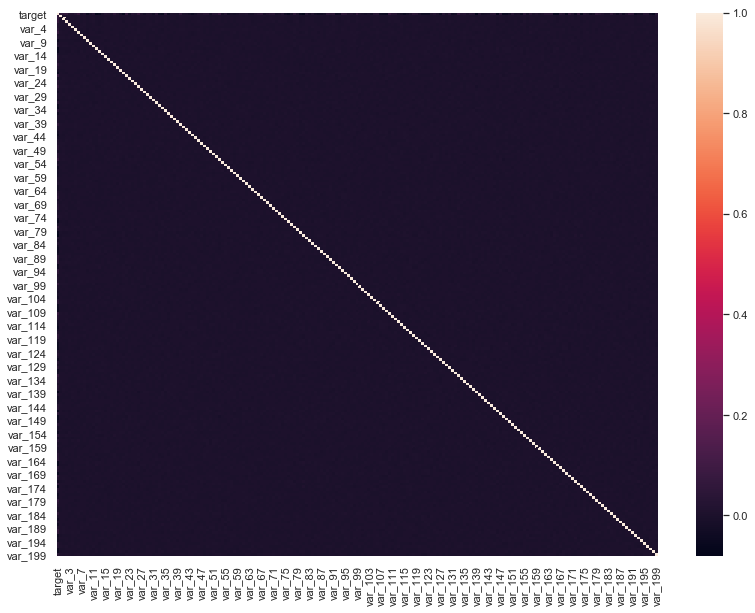

In [19]:
train_corr = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(train_corr)

In [20]:
corr = train.corr()
abs(corr['target']).sort_values(ascending=False).head(30)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
var_174    0.061669
var_22     0.060558
var_21     0.058483
var_99     0.058367
var_166    0.057773
var_80     0.057609
var_190    0.055973
var_2      0.055870
var_165    0.055734
var_13     0.055156
var_148    0.055011
var_133    0.054548
var_198    0.053000
var_34     0.052692
var_0      0.052390
var_1      0.050343
var_115    0.050174
var_179    0.050002
var_109    0.049926
var_40     0.049530
Name: target, dtype: float64

In [46]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.tail(10)

level_0  level_1         0
2440  var_190  var_171  0.007570
2441  var_171  var_190  0.007570
2442  var_166  var_191  0.007798
2443  var_191  var_166  0.007798
2444  var_167  var_173  0.008045
2445  var_173  var_167  0.008045
2446  var_172  var_193  0.008163
2447  var_193  var_172  0.008163
2448  var_183  var_189  0.009359
2449  var_189  var_183  0.009359

###* We find that correlation between variables is very less.

### Outlier Analysis

In [22]:
def plot_feature_boxplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

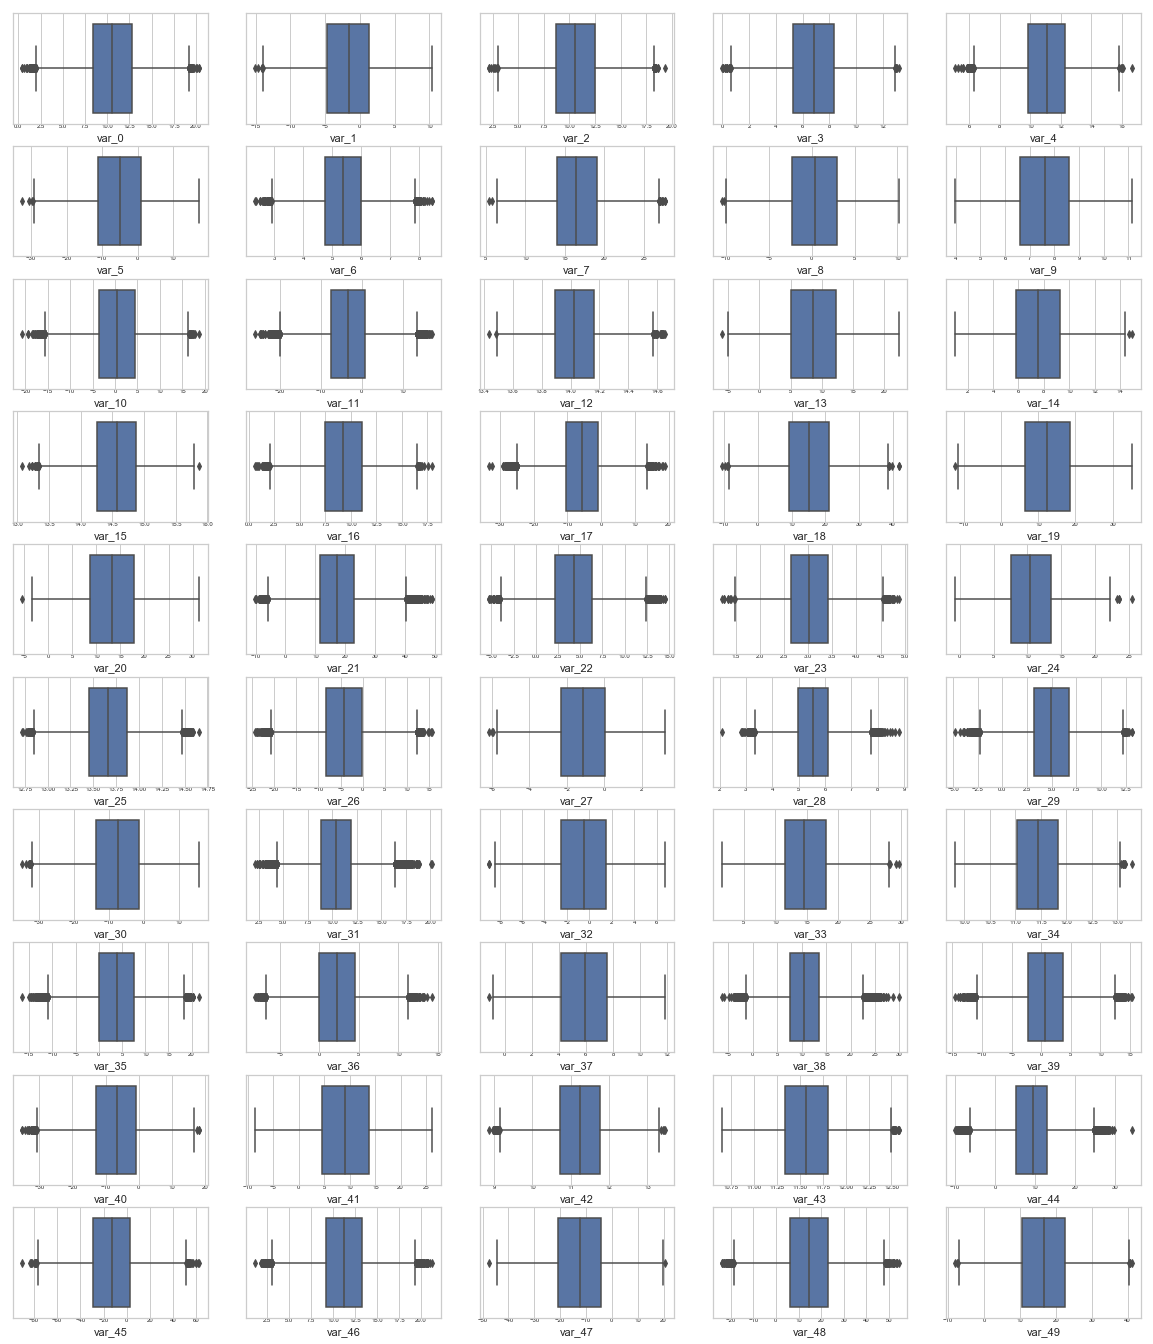

In [23]:
#From var_0 to var_49
features = train.columns.values[2:52]
plot_feature_boxplot(train, features)


<Figure size 432x288 with 0 Axes>

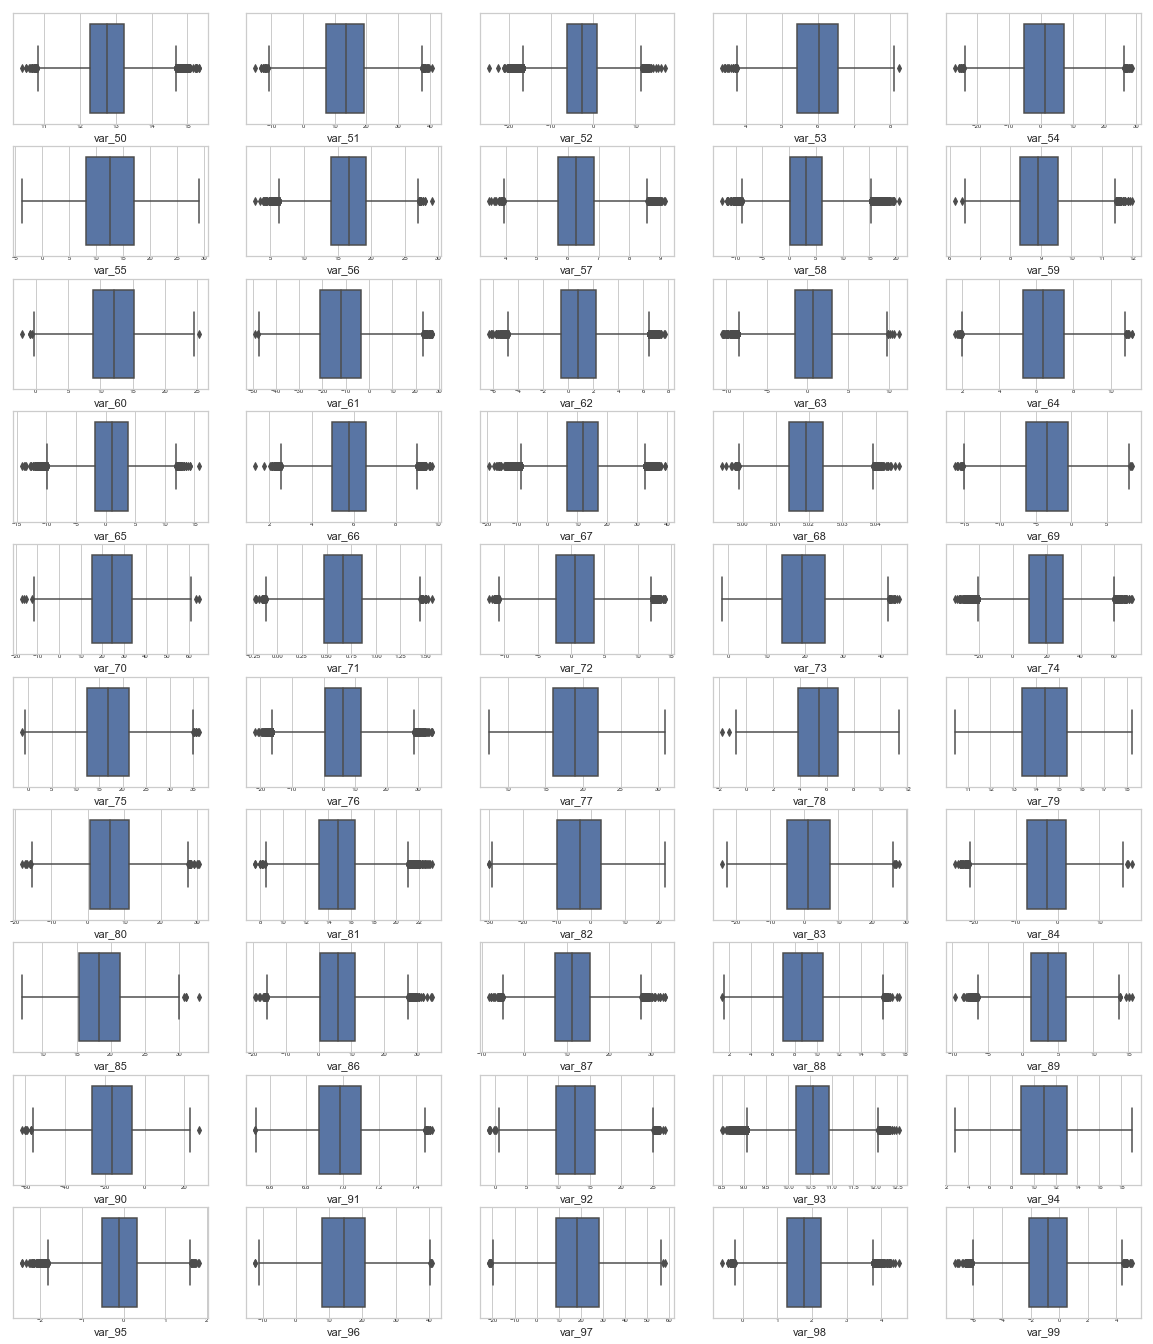

In [24]:
#From var_50 to var_99
features = train.columns.values[52:102]
plot_feature_boxplot(train, features)


<Figure size 432x288 with 0 Axes>

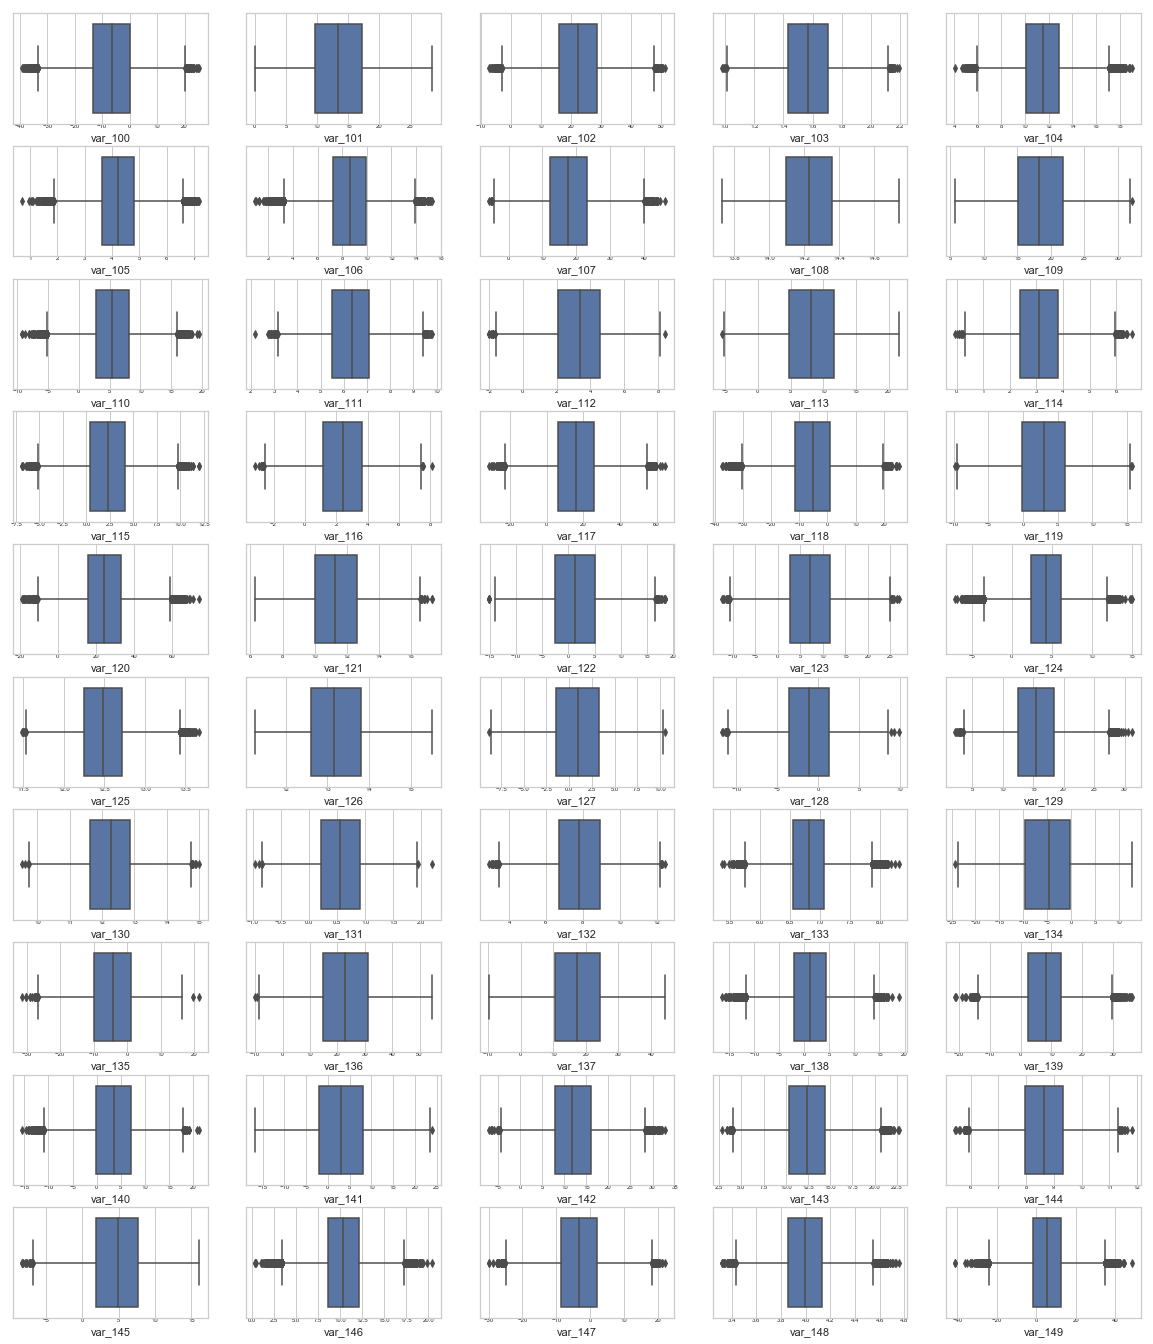

In [25]:
#From var_100 to var_149
features = train.columns.values[102:152]
plot_feature_boxplot(train, features)


<Figure size 432x288 with 0 Axes>

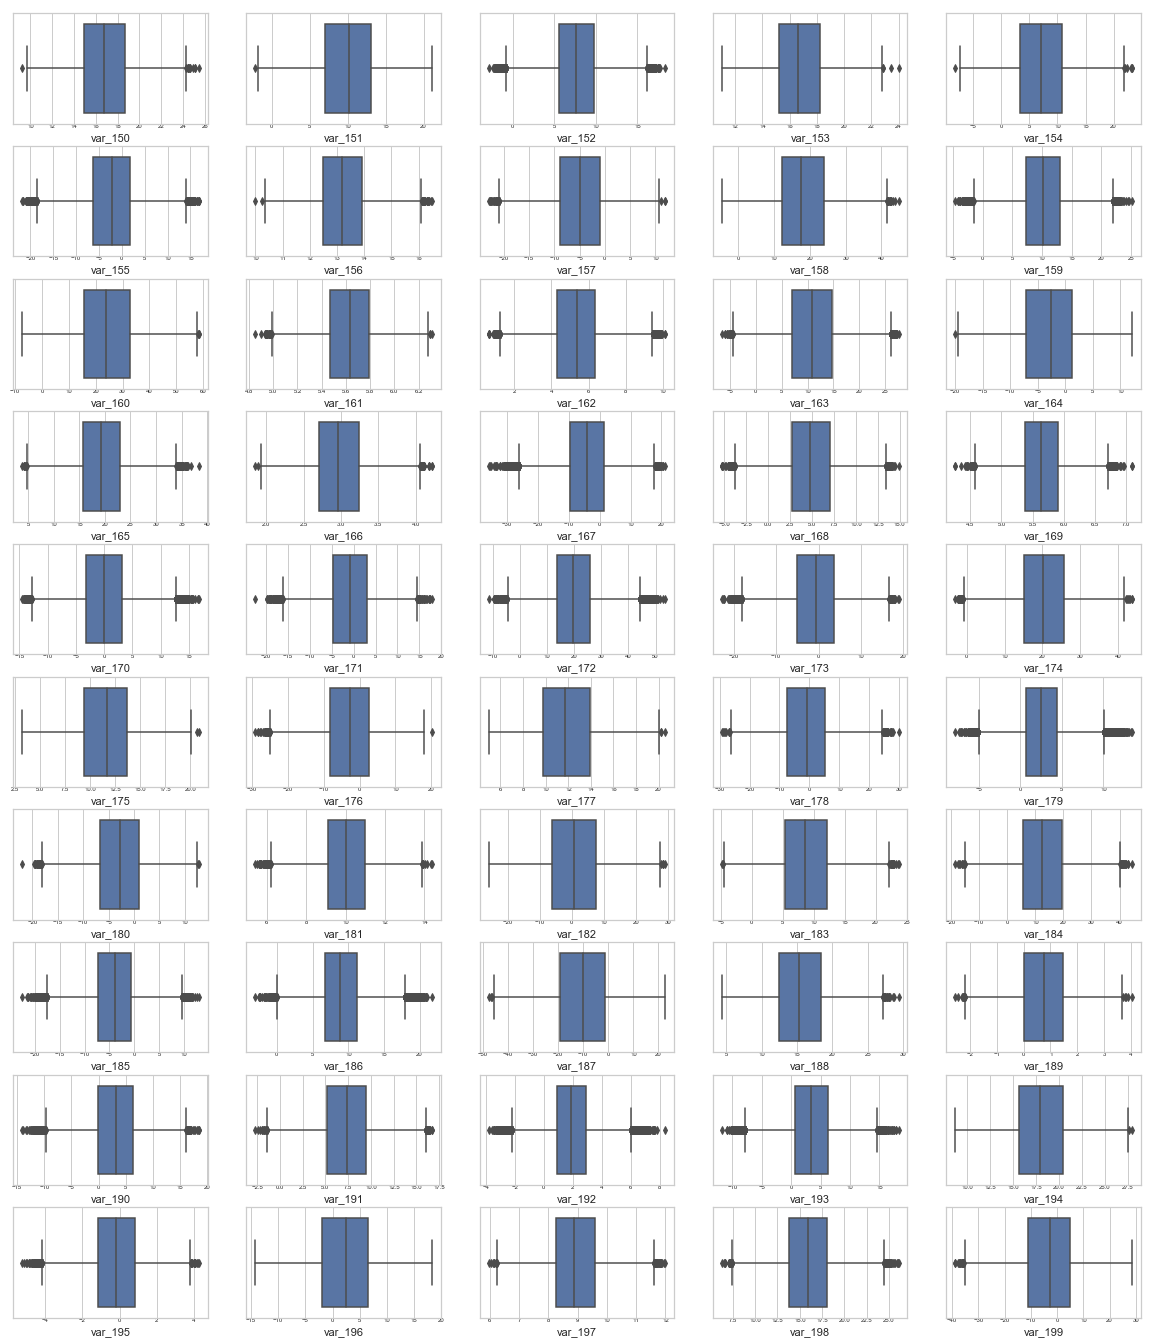

In [26]:
#From var_150 to var_199
features = train.columns.values[152:202]
plot_feature_boxplot(train, features)


In [27]:
# Detect outliers from IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

target      0.000000
var_0       4.304350
var_1       6.098650
var_2       3.794225
var_3       3.070025
var_4       2.377950
var_5      12.125150
var_6       1.235300
var_7       5.159100
var_8       5.255700
var_9       1.965625
var_10      7.977875
var_11      8.363425
var_12      0.270200
var_13      7.201975
var_14      3.488550
var_15      0.611700
var_16      3.603625
var_17      9.665450
var_18     11.835375
var_19     12.156825
var_20      9.251600
var_21     11.538050
var_22      4.110800
var_23      0.769700
var_24      5.866600
var_25      0.407300
var_26      8.231525
var_27      2.323525
var_28      1.101600
             ...    
var_170     6.354900
var_171     7.677150
var_172    12.175950
var_173     8.629425
var_174    10.576625
var_175     4.373900
var_176    11.090900
var_177     4.122625
var_178    12.734450
var_179     3.765550
var_180     7.670100
var_181     1.926600
var_182    13.563600
var_183     6.704325
var_184    13.792850
var_185     6.769350
var_186     4

In [28]:
print("df.shape:",train.shape)
df_in = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out = train[((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

df.shape: (200000, 202)
df_in.shape: (157999, 202)
df_out.shape: (42001, 202)


In [29]:
df_in['target'].value_counts()

0    157999
Name: target, dtype: int64

In [30]:
# comparing the 'train' and 'df_out' dataset,
# we can say that all the data points with target equals to 1 are present as outliers 
df_out['target'].value_counts()

0    21903
1    20098
Name: target, dtype: int64

In [31]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

### Principal component analysis (PCA)

- PCA is a dimensionality reduction technique that reduces less-informative 'noise' features. 
- But PCA is sensitive to variance and different scales, so standardizing will help PCA perform better.
- However, since we found that the correlation between different features in the training dataset is not that significant, so using PCA might not be meaningful.

In [33]:
from sklearn.preprocessing import StandardScaler
standardized_train = StandardScaler().fit_transform(train.set_index(['ID_code','target']))

In [34]:
standardized_train = pd.DataFrame(standardized_train, columns=train.set_index(['ID_code','target']).columns)
standardized_train = train[['ID_code','target']].join(standardized_train)

In [35]:
from sklearn.decomposition import PCA
k=80
pca = PCA(n_components=k, random_state=42, whiten=True)
pca.fit(standardized_train.set_index(['ID_code','target']))

PCA(copy=True, iterated_power='auto', n_components=80, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)

In [36]:
pca.explained_variance_ratio_

array([0.00591451, 0.00522552, 0.00521671, 0.00520654, 0.00519488,
       0.00518693, 0.00518222, 0.00517667, 0.00517406, 0.00517086,
       0.00516282, 0.00515946, 0.00514944, 0.00514182, 0.0051394 ,
       0.00513572, 0.00513078, 0.00512844, 0.00512544, 0.00511469,
       0.00511099, 0.00511025, 0.00510766, 0.00510344, 0.00509622,
       0.00509389, 0.00509118, 0.00508541, 0.00508276, 0.00507842,
       0.00507568, 0.00507154, 0.00506581, 0.0050639 , 0.00505997,
       0.00505587, 0.0050516 , 0.00504642, 0.00504114, 0.00503891,
       0.00503706, 0.00503184, 0.00503123, 0.00502715, 0.00502124,
       0.00501869, 0.00501523, 0.00501267, 0.00500916, 0.00500615,
       0.00500152, 0.00499823, 0.00499106, 0.00498848, 0.00498359,
       0.00498109, 0.00497583, 0.00497271, 0.00496443, 0.00496283,
       0.004962  , 0.00495606, 0.00495022, 0.00494825, 0.00494397,
       0.0049428 , 0.0049402 , 0.00493566, 0.00493158, 0.00492412,
       0.0049194 , 0.00491661, 0.00491372, 0.00490621, 0.00490

In [37]:
sum(pca.explained_variance_ratio_)

0.4040625557015899

Text(0,0.5,'Proportion of variance explained by additional feature')

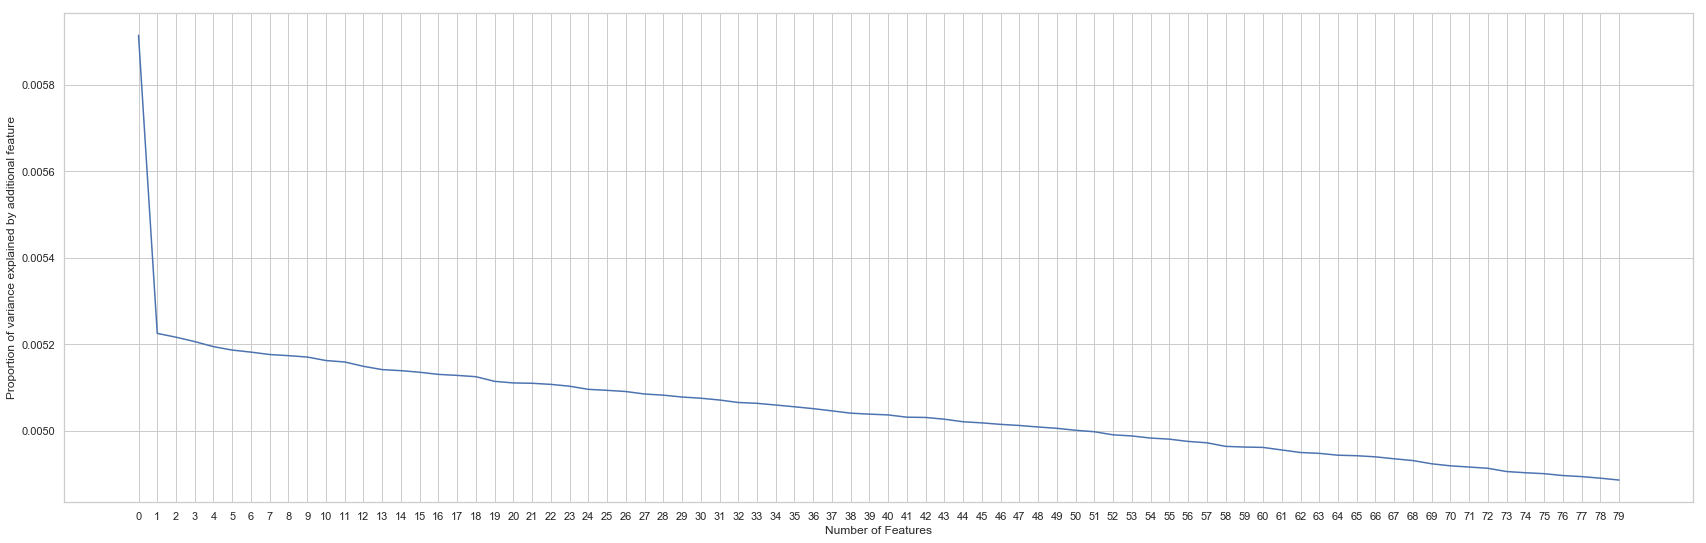

In [38]:
plt.figure(figsize=(26,9))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(k))
plt.xlabel("Number of Features")
plt.ylabel("Proportion of variance explained by additional feature")

- Normally, if there is a elbow looking point in the graph above, the x value(number of features) of that point is usually the ideal number of components for PCA.
- However in this case, each principal component explains very little of the total variance (e.g. first principal component only explains about 0.6% of the total variance). 
- Even when we sum up all the variance explained by the 80 principal components, it only amounts to 40%. Let's increase the k and see what happens

In [39]:
sum(PCA(n_components=120, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)

0.6043175041677917

In [40]:
sum(PCA(n_components=170, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)

0.857173786247749

- Even with using 170 principal components, 85% of the total variance is explained.
- Hence we proved, that PCA is best when the dimension is very large and a lot of features are correlated to one another a lot.

## Modelling

In [10]:
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(['target', 'ID_code'],axis=1)
test_inp = test.drop(columns = ['ID_code'])



In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_inp, Target, test_size= 0.3, random_state = 2019)

In [12]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size= 0.2, random_state = 2019)

In [13]:
# check the split of train and validation
print('Train:',X_train.shape[0])
print('Test:',X_test.shape[0])
print('cv:',X_cv.shape[0])

Train: 78400
Test: 42000
cv: 19600


## Logistic Regression
- We start with most basic algorithm used for classification problems. 


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train_vec= sc.fit_transform(X_train)
X_cv_vec = sc.transform(X_cv)
X_test_vec = sc.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
tr_scores=[]
cv_scores=[]
C=[10**-4, 10**-3,10**-2,10**-1,10**0,10**1, 10**2, 10**3,10**4]
for i in C:
    lr=LogisticRegression(penalty='l1',C=i)
    lr.fit(final_counts,y_train)
    y_train_predict=lr.predict_proba(final_counts)[:,1]
    y_cv_predict=lr.predict_proba(x_cv_vec)[:,1]
    tr_scores.append(roc_auc_score(y_train,y_train_predict))
    cv_scores.append(roc_auc_score(y_cv, y_cv_predict))
    

In [9]:
optimal=C[cv_scores.index(max(cv_scores))]

In [10]:
lr_optimal = LogisticRegression(C = optimal,penalty='l2')

# fitting the model
lr_optimal.fit(X_train_vec, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, lr_optimal.predict_proba(X_train_vec)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lr_optimal.predict_proba(X_test_vec)[:,1])



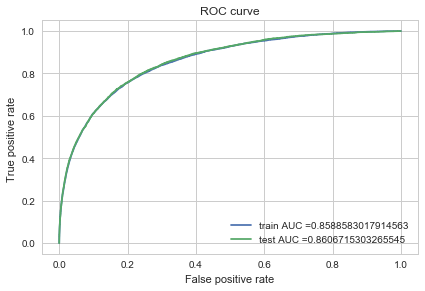

In [11]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate ")
plt.title("ROC curve")
plt.show()

In [12]:
predictions=lr_optimal.predict(X_test_vec)
y_score=lr_optimal.predict_proba(X_test_vec)[:,1]
y_train_score=lr_optimal.predict_proba(X_train_vec)[:,1]

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     37757
           1       0.69      0.26      0.38      4243

    accuracy                           0.91     42000
   macro avg       0.81      0.62      0.67     42000
weighted avg       0.90      0.91      0.90     42000



Text(0.5,1,'CONFUSION MATRIX FOR TEST DATASET')

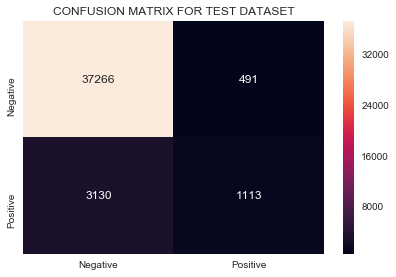

In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TEST DATASET")

Text(0.5,1,'CONFUSION MATRIX FOR TRAIN DATASET')

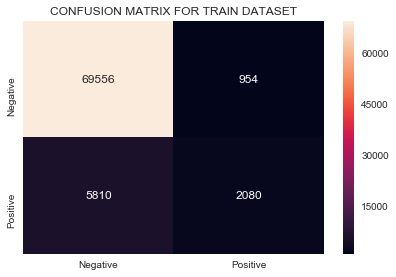

In [15]:
from sklearn.metrics import confusion_matrix
predict=lr_optimal.predict(X_train_vec)
conf_matrix = confusion_matrix(y_train, predict)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TRAIN DATASET")

### Logistic regression with class weight balanced

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
tr_scores=[]
cv_scores=[]
C=[10**-4, 10**-3,10**-2,10**-1,10**0,10**1, 10**2, 10**3,10**4]
for i in C:
    lr=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    lr.fit(final_counts,y_train)
    y_train_predict=lr.predict_proba(final_counts)[:,1]
    y_cv_predict=lr.predict_proba(x_cv_vec)[:,1]
    tr_scores.append(roc_auc_score(y_train,y_train_predict))
    cv_scores.append(roc_auc_score(y_cv, y_cv_predict))

In [21]:
optimal=C[cv_scores.index(max(cv_scores))]

In [13]:
lr_optimal = LogisticRegression(C = optimal,penalty='l2',class_weight='balanced')

# fitting the model
lr_optimal.fit(X_train_vec, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, lr_optimal.predict_proba(X_train_vec)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lr_optimal.predict_proba(X_test_vec)[:,1])



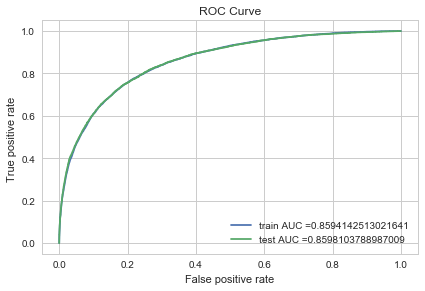

In [14]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate ")
plt.title("ROC Curve")
plt.show()

In [18]:
predictions=lr_optimal.predict(X_test_vec)
y_score=lr_optimal.predict_proba(X_test_vec)[:,1]
y_train_score=lr_optimal.predict_proba(X_train_vec)[:,1]

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     37757
           1       0.28      0.78      0.41      4243

    accuracy                           0.78     42000
   macro avg       0.63      0.78      0.64     42000
weighted avg       0.90      0.78      0.82     42000



Text(0.5,1,'CONFUSION MATRIX FOR TEST DATASET')

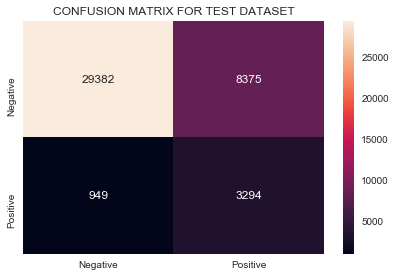

In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TEST DATASET")

Text(0.5,1,'CONFUSION MATRIX FOR TRAIN DATASET')

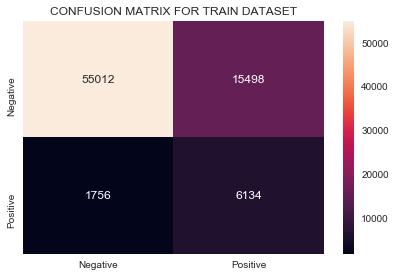

In [21]:
from sklearn.metrics import confusion_matrix
predict=lr_optimal.predict(X_train_vec)
conf_matrix = confusion_matrix(y_train, predict)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TRAIN DATASET")

### Decision Trees
- Moving on to a slightly advanced algorithm, decision trees. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

max_depth = [1, 5, 10, 50]
min_splits = [5, 10, 50, 100]
cv_scores=[]
tr_scores=[]
i=0
for x in max_depth:
    for j in min_splits:
        dt=DecisionTreeClassifier(max_depth=x,min_samples_split=j)
        dt.fit(X_train,y_train)
        y_tr_pred=dt.predict_proba(X_train)[:,1]
        y_cv_pred=dt.predict_proba(X_cv)[:,1]
        scores=roc_auc_score(y_train,y_tr_pred)
        tr_scores.append(scores)
        scores=roc_auc_score(y_cv,y_cv_pred)
        cv_scores.append(scores)
        print("CV ROC_AUC Score : ", cv_scores[i], " Train ROC_AUC Score : ", tr_scores[i], "Max depth : ", x, " MinSplits : ", j)
        i += 1


CV ROC_AUC Score :  0.5381684178224093  Train ROC_AUC Score :  0.5484251979826861 Max depth :  1  MinSplits :  5
CV ROC_AUC Score :  0.5381684178224093  Train ROC_AUC Score :  0.5484251979826861 Max depth :  1  MinSplits :  10
CV ROC_AUC Score :  0.5381684178224093  Train ROC_AUC Score :  0.5484251979826861 Max depth :  1  MinSplits :  50
CV ROC_AUC Score :  0.5381684178224093  Train ROC_AUC Score :  0.5484251979826861 Max depth :  1  MinSplits :  100
CV ROC_AUC Score :  0.5381684178224093  Train ROC_AUC Score :  0.5484251979826861 Max depth :  1  MinSplits :  500
CV ROC_AUC Score :  0.6079823828768941  Train ROC_AUC Score :  0.6281082045908867 Max depth :  5  MinSplits :  5
CV ROC_AUC Score :  0.6079672358395231  Train ROC_AUC Score :  0.6281082045908867 Max depth :  5  MinSplits :  10
CV ROC_AUC Score :  0.6079782711062705  Train ROC_AUC Score :  0.6280283077897606 Max depth :  5  MinSplits :  50
CV ROC_AUC Score :  0.6079630182512731  Train ROC_AUC Score :  0.6280133767397015 Max de

In [15]:
#Train Best Model.
model = DecisionTreeClassifier(max_depth=10, min_samples_split=500)
model.fit(X_train, y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


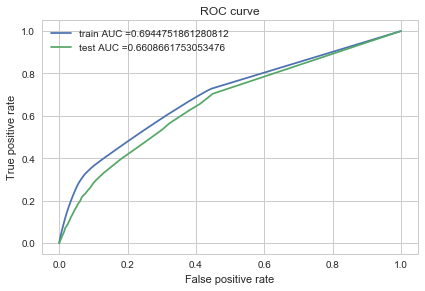

In [16]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()

In [17]:
predictions=lr_optimal.predict(X_test_vec)
y_score=lr_optimal.predict_proba(X_test_vec)[:,1]
y_train_score=lr_optimal.predict_proba(X_train_vec)[:,1]

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     37757
           1       0.28      0.78      0.41      4243

    accuracy                           0.78     42000
   macro avg       0.63      0.78      0.64     42000
weighted avg       0.90      0.78      0.82     42000



Text(0.5,1,'CONFUSION MATRIX FOR TEST DATASET')

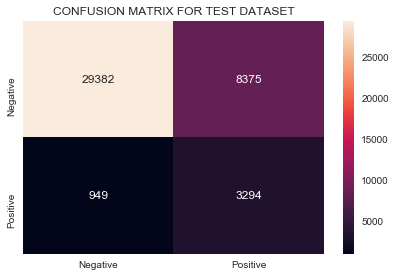

In [19]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TEST DATASET")

Text(0.5,1,'CONFUSION MATRIX FOR TRAIN DATASET')

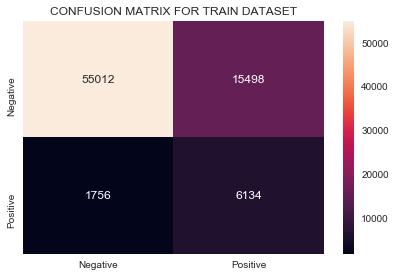

In [20]:
from sklearn.metrics import confusion_matrix
predict=lr_optimal.predict(X_train_vec)
conf_matrix = confusion_matrix(y_train, predict)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TRAIN DATASET")

## Feature importance

In [28]:
features = train.columns.values[2:202]
# Extract feature importances
feature_importance_values = model.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

feature  importance
81    var_81    0.122110
12    var_12    0.101552
53    var_53    0.066728
174  var_174    0.056599
139  var_139    0.053762
109  var_109    0.046021
22    var_22    0.044781
146  var_146    0.034290
26    var_26    0.031913
110  var_110    0.026477

### Ensemble Learning
- Ensemble Learning refers to the algorithms that created using ensembles of variour learning algorithms. For example, random forests are ensembles of many decision tree estimators.


- There are 2 types of ensemble learning algorithms 
    1. Bagging Algorithms: Bagging involves having each model in the ensemble vote with equal weight for the final output. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set 
    2. Boosting Algorithms: Boosting involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified.

### Random Forest


In [22]:
clf = RandomForestClassifier(max_depth=90,n_estimators=500,random_state=0)
clf.fit(X_train,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    

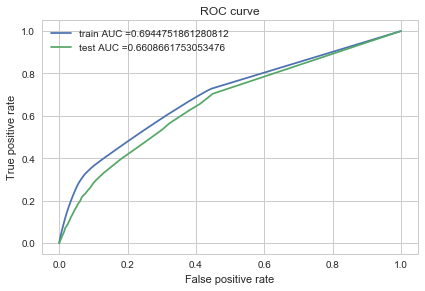

In [23]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()

In [24]:
predictions=lr_optimal.predict(X_test_vec)
y_score=lr_optimal.predict_proba(X_test_vec)[:,1]
y_train_score=lr_optimal.predict_proba(X_train_vec)[:,1]

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86     37757
           1       0.28      0.78      0.41      4243

    accuracy                           0.78     42000
   macro avg       0.63      0.78      0.64     42000
weighted avg       0.90      0.78      0.82     42000



Text(0.5,1,'CONFUSION MATRIX FOR TEST DATASET')

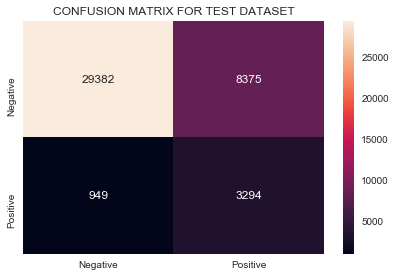

In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TEST DATASET")

Text(0.5,1,'CONFUSION MATRIX FOR TRAIN DATASET')

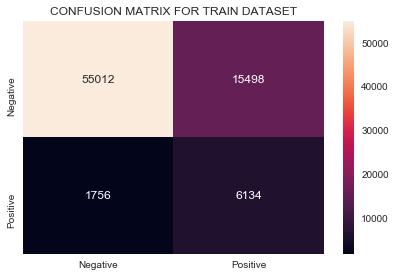

In [27]:
from sklearn.metrics import confusion_matrix
predict=lr_optimal.predict(X_train_vec)
conf_matrix = confusion_matrix(y_train, predict)
confusion_matrix_df = pd.DataFrame(conf_matrix,["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="g")
plt.title("CONFUSION MATRIX FOR TRAIN DATASET")

In [29]:
# Extract feature importances
feature_importance_values = clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

feature  importance
81    var_81    0.011831
12    var_12    0.010352
139  var_139    0.008611
53    var_53    0.008438
174  var_174    0.008417
80    var_80    0.008103
26    var_26    0.007976
110  var_110    0.007938
146  var_146    0.007806
166  var_166    0.007674

### Light Gradient Boosting Method

WHAT IS IT?

- Light GBM is a gradient boosting framework that uses tree based learning algorithm. It grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

WHY USE LGB?

- It is ‘Light’ because of its high speed. It can handle large data, requires low memory to run and focuses on accuracy of results. 

Ensemble of 200 LGB models
- training model with 2 features at a time: The original one and an extra column with the unique values count.

In [66]:
param = {
   'learning_rate': 0.05,
   'max_depth': 4,
   'num_leaves': 25,
   'feature_fraction': 1,
   'objective': 'binary',
   'boosting_type': 'gbdt',
   'verbosity': -1,
   'metric': 'auc',
   'is_unbalance': True
    }

In [91]:
seed = 2319
iterations = 130


features = [c for c in X_train.columns if (c not in ['ID_code', 'target'])]
feature_importance_df = pd.DataFrame()
test_size = 0.3

y_hat = np.zeros([int(200000*test_size), 200])

i = 0
for feature in ['var_' + str(x) for x in range(200)]: # loop over all features
    print(feature)
    feat_choices = [feature, 'new_' + feature]
    lgb_train = lgb.Dataset(X_train[feat_choices], y_train)
    gbm = lgb.train(param, lgb_train, iterations, verbose_eval=-1)
    y_hat[:, i] = gbm.predict(X_test[feat_choices], num_iteration=gbm.best_iteration)
    feature_importance_df= feature_importance_df.append({'feature' : feature, 
    'importance': gbm.feature_importance()} ,ignore_index=True)
    i += 1
    
y_pred = (y_hat).sum(axis=1)
score = roc_auc_score(y_test, y_pred)
print('Your roc_auc score is', score) 

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7
var_8
var_9
var_10
var_11
var_12
var_13
var_14
var_15
var_16
var_17
var_18
var_19
var_20
var_21
var_22
var_23
var_24
var_25
var_26
var_27
var_28
var_29
var_30
var_31
var_32
var_33
var_34
var_35
var_36
var_37
var_38
var_39
var_40
var_41
var_42
var_43
var_44
var_45
var_46
var_47
var_48
var_49
var_50
var_51
var_52
var_53
var_54
var_55
var_56
var_57
var_58
var_59
var_60
var_61
var_62
var_63
var_64
var_65
var_66
var_67
var_68
var_69
var_70
var_71
var_72
var_73
var_74
var_75
var_76
var_77
var_78
var_79
var_80
var_81
var_82
var_83
var_84
var_85
var_86
var_87
var_88
var_89
var_90
var_91
var_92
var_93
var_94
var_95
var_96
var_97
var_98
var_99
var_100
var_101
var_102
var_103
var_104
var_105
var_106
var_107
var_108
var_109
var_110
var_111
var_112
var_113
var_114
var_115
var_116
var_117
var_118
var_119
var_120
var_121
var_122
var_123
var_124
var_125
var_126
var_127
var_128
var_129
var_130
var_131
var_132
var_133
var_134
var_135
var_136
var_137
var_13

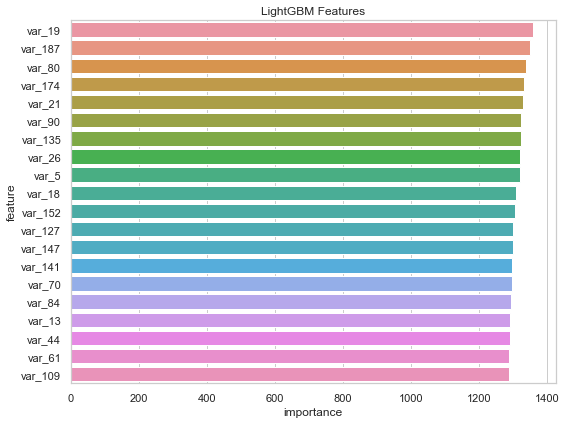

In [97]:
#feature_importance_df['importance']=feature_importance_df['importance'].apply(lambda x : x[0])
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:20].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()

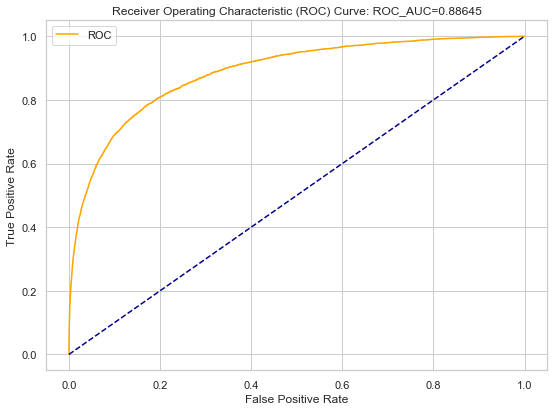

In [287]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [25]:
from prettytable import PrettyTable
x=PrettyTable()
sno=[1,2,3,4,5]
model=['Logistic regressio w/o class balanced','Logistic regression with class balanced','Decsion tree','Random forest','Light GBM']
test=[0.86,0.86,0.66,0.66,0.88]
x.add_column("S.No.",sno)
x.add_column("Model",model)
#x.add_column("Train_AUC",train)
x.add_column("Test_AUC",test)
print(x)

+-------+-----------------------------------------+----------+
| S.No. |                  Model                  | Test_AUC |
+-------+-----------------------------------------+----------+
|   1   |  Logistic regressio w/o class balanced  |   0.86   |
|   2   | Logistic regression with class balanced |   0.86   |
|   3   |               Decsion tree              |   0.66   |
|   4   |              Random forest              |   0.66   |
|   5   |                Light GBM                |   0.88   |
+-------+-----------------------------------------+----------+


## Observation
- Decision tree and random forest giving low AUC score.
- Light GBM method giving good AUC score which is 0.88.

### Procedure to be followed:
- Load the dataset.
- Perform exploratory data analysis and visualization to gain insight into dataset.
- Perform missing value analysis, as we can see that there are no any missing values present in the dataset.
- Perform correlation analysis.
- Perform outlier analysis with boxplot.
- Perform PCA(Principal component analysis).
- Perfrom feature engineering.
- Split train dataset into train and cross validation dataset.
- Apply various models of machine learning and get results.